# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ML][MS][HW03] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [178]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import sklearn.metrics as lol

In [3]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [4]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуйте обе эти метрики.

In [5]:
def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    return ((y_true - y_predicted) ** 2).sum() / len(y_true)

def r2(y_true:np.ndarray, y_predicted:np.ndarray):
    return 1 - mse(y_true, y_predicted) / mse(np.array([y_true.sum() / len(y_true)] * len(y_true)), y_true)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [166]:
class NormalLR:
    w = None
    b = None
    
    def __init__(self):
        pass
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        c = X.copy()
        tmp = []
        for i in range(0, len(X)):
            tmp.append(np.append(X[i], 1.0))
        X = np.array(tmp)
        tmp = np.dot(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)
        self.w = tmp[:-1]
        self.b = tmp[len(tmp) - 1]
        X = c
            
    def predict(self, X:np.ndarray) -> np.ndarray:
        return np.dot(X, self.w) + np.array([self.b] * len(X))

In [167]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [168]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")
print(lol.mean_squared_error(y_test, y_pred), lol.r2_score(y_test, y_pred))

MSE: 0.009559304025627567, R2: 0.9956262195676746
0.009559304025627567 0.9956262195676746


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [169]:
class GradientLR:
    w = None
    b = None
    alpha = None
    iterations = None
    l = None
    
    def __init__(self, alpha:float, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        tmp = []
        for i in range(0, len(X)):
            tmp.append(np.append(X[i], 1.0))
        x = np.array(tmp)
        self.w = np.array([0.0] * len(x[0]))
        
        for i in range(0, self.iterations):
            grad = 2 * (x.T @ ((x @ self.w) - y)) / len(x) - self.l * np.sign(self.w)
            self.w -= self.alpha * grad
                    
        self.b = self.w[len(self.w) - 1]
        self.w = self.w[:-1]
                
    def predict(self, X:np.ndarray):
        return np.dot(X, self.w) + np.array([self.b] * len(X))

In [225]:
def build_plot(X_train, y_train, X_test, y_test):
    xs = np.arange(0.0, 0.002, 0.00002)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.grid()
    plt.plot(xs, errors)
    plt.show()

In [226]:
X, y = generate_synthetic(1024)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

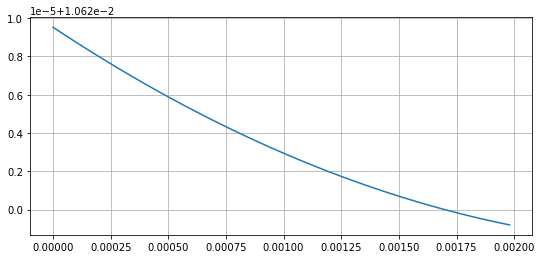

In [227]:
build_plot(X_train, y_train, X_test, y_test)

In [173]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")
print(lol.mean_squared_error(y_test, y_pred), lol.r2_score(y_test, y_pred))

MSE: 0.010109574346443589, R2: 0.998472424202842
0.010109574346443589 0.998472424202842


### Задание 4 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [248]:
X, y = read_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [249]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_val, y_pred)}")

MSE: 22266311.080836903, R2: 0.687279747566105


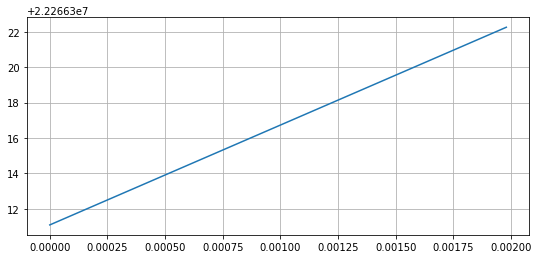

In [250]:
build_plot(X_train, y_train, X_val, y_val)

In [252]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_val, y_pred)}")
for i, v in enumerate(regr.w):
    print(i + 1, v)

MSE: 22266311.080836885, R2: 0.6872797475661053
1 -946.3479052142993
2 1266.9355808194746
3 -137.12453573377329
4 590.0552654366363
5 -2005.8563661926162
6 2605.1892611867784
7 295.143072451576
8 -3286.024944664332
9 2858.996730636104
10 -2453.388543760182
11 -1965.9499716955363
12 797.4727263087841
13 -4001.3992372453276


##### Задание 5 (2 балла)
Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.

Проанализировав веса соответсвующих признаков, можно сделать вывод, что больше всего на понижение цены влияют признаки 13 и 8, а на повышение 6 и 9.